# Experiment records
- Trained model name: model_161222/ checkpoint_09_0.02.h5
- Trained for: 15 epochs
- Augmentations used: Yes
- Accuracy achieved: approx. 97.1%
- Dataset used: NIST dataset (https://s3.amazonaws.com/nist-srd/SD19/by_class.zip)
- Description of experiment: Check performance of new trained model on existing dataset

In [1]:
import tensorflow as tf
import sys  
import os
sys.path.append(os.path.realpath('../../src'))
# from predict import pred_using_h5_digit, pred_using_tflite_model
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

2022-12-23 16:39:56.877734: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-23 16:39:56.877756: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = tf.keras.models.load_model('../../models/saved_model/checkpoint_09_0.02.h5')

2022-12-23 16:39:58.539404: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-23 16:39:58.539427: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2022-12-23 16:39:58.539708: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def pred_using_h5_digit(model, path, gt = None, prediction= None, wrong_results = None):
    result = {}
    wrong_results = {}
    gt=[]
    prediction = []
    wrong_count=0
    for img1 in sorted(glob.iglob(path)):
        img=cv2.imread(img1)
        img=cv2.resize(img,(28,28))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.astype('float32') / 255.
        img= np.reshape(img,(1,28,28,1))
        res=model.predict(img)
        pred=res[0].argmax(axis=0)
        ground_truth = int(img1.split('/')[-2])
        gt.append(int(ground_truth))
        prediction.append(pred)
        result[img1] = pred
        if pred!= int(ground_truth):
            wrong_count+=1
            wrong_results[img1] = pred
    accuracy = (len(glob.glob(path))-wrong_count)/len(glob.glob(path))
    return result, accuracy, gt, prediction, wrong_results

In [6]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/0/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [7]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9794661190965093
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       487
           1       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.98       487
   macro avg       0.20      0.20      0.20       487
weighted avg       1.00      0.98      0.99       487



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/1/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [9]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       510

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [10]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/2/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [11]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9666666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       1.00      0.97      0.98       510
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.97       510
   macro avg       0.11      0.11      0.11       510
weighted avg       1.00      0.97      0.98       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/3/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [32]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8745098039215686
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.87      0.93       510
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.87       510
   macro avg       0.14      0.12      0.13       510
weighted avg       1.00      0.87      0.93       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
len(wrong_results)

64

Text(0.5, 0.98, 'Misclassifications')

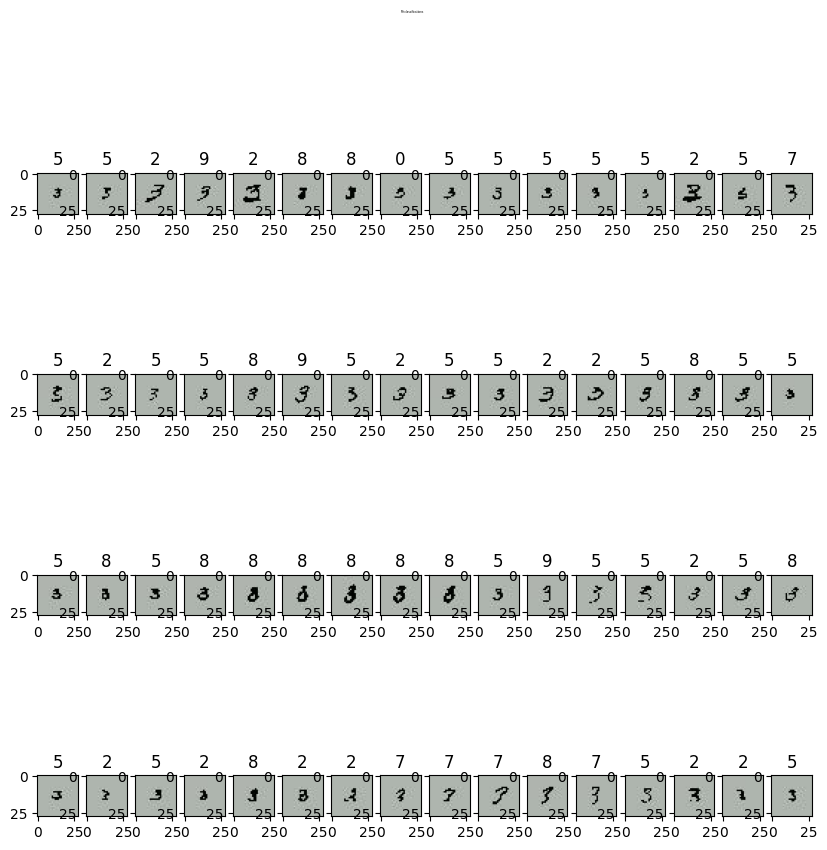

In [36]:
import operator
fig, axis = plt.subplots(nrows= 4, ncols=16, figsize=(10,10))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [14]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/4/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [16]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9980392156862745
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       510
           9       0.00      0.00      0.00         0

    accuracy                           1.00       510
   macro avg       0.50      0.50      0.50       510
weighted avg       1.00      1.00      1.00       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/5/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [18]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9901960784313726
              precision    recall  f1-score   support

           5       1.00      0.99      1.00       510
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.99       510
   macro avg       0.33      0.33      0.33       510
weighted avg       1.00      0.99      1.00       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/6/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [20]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9941176470588236
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       1.00      0.99      1.00       510
           8       0.00      0.00      0.00         0

    accuracy                           0.99       510
   macro avg       0.25      0.25      0.25       510
weighted avg       1.00      0.99      1.00       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/7/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [22]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction)

0.9823529411764705
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           7       1.00      0.98      0.99       510
           9       0.00      0.00      0.00         0

    accuracy                           0.98       510
   macro avg       0.33      0.33      0.33       510
weighted avg       1.00      0.98      0.99       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/8/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [24]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9431372549019608
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       1.00      0.94      0.97       510
           9       0.00      0.00      0.00         0

    accuracy                           0.94       510
   macro avg       0.11      0.10      0.11       510
weighted avg       1.00      0.94      0.97       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
path = os.path.expanduser('~')+'/grayscale_NSIT_test/9/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [26]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9882352941176471
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       1.00      0.99      0.99       510

    accuracy                           0.99       510
   macro avg       0.25      0.25      0.25       510
weighted avg       1.00      0.99      0.99       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
